#__Описание данных__
- ads_data.csv – данные взаимодействий с рекламными объявлениями

    * date – дата
    * time – время
    * event – действие (просмотр/клик)
    * platform – платформа
    * ad_id – id объявления
    * client_union_id – id рекламного кабинета
    * campaign_union_id – id рекламной кампании
    * ad_cost_type – тип оплаты
    * ad_cost – цена
    * has_video – есть ли видео
    * target_audience_count – размер аудитории

  &nbsp;
-   ads_clients_data.csv – характеристики рекламных клиентов


    * date – дата
    * client_union_id – id рекламного кабинета
    * community_id – id сообщества
    * create_date – дата создания рекламного клиента

In [43]:
import pandas as pd
import numpy as np

import seaborn as sns

In [3]:
ads_data = (
    pd.read_csv(r'D:\downloads\my_files\mnt\HC_Volume_18315164\home-jupyter\jupyter-ale-nikitin\shared\homeworks\python_ds_miniprojects\6\ads_data.csv')
)

ads_data.head()

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501


__Посчитаем среднее количество разных рекламных событий (показы и клики) по объявлениям.__

In [13]:
(
ads_data.groupby(['ad_id', 'event'], as_index=False)
.agg({'time': 'count'})
.rename(columns={'time': 'nmbr'})
.pivot(columns='event', index='ad_id', values='nmbr')
.fillna(0)
.mean()
.round()
)

event
click    113.0
view     923.0
dtype: float64

__Посмотрим на распределение показов объявлений__

C:\Temp\ipykernel_13924\1633402861.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(view_number.views_nmbr)


<AxesSubplot: xlabel='views_nmbr', ylabel='Density'>

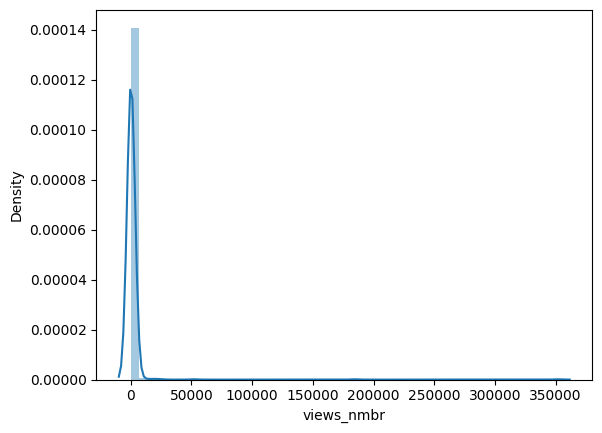

In [42]:
view_number = (
    ads_data.query("event == 'view'")
    .groupby('ad_id').agg({'event': 'count'})
    .rename(columns={'event': 'views_nmbr'})
)
sns.distplot(view_number.views_nmbr)

Прологорифмируем количество показов, чтобы график был более наглядным

C:\Temp\ipykernel_13924\2426290923.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(view_number.log_view_nmbr)


<AxesSubplot: xlabel='log_view_nmbr', ylabel='Density'>

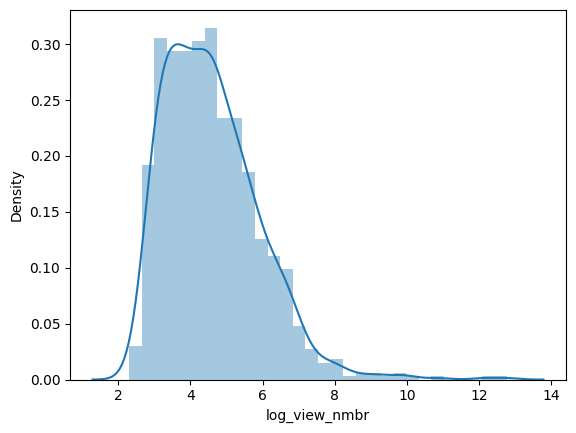

In [48]:
view_number['log_view_nmbr'] =  np.log(view_number.views_nmbr)
sns.distplot(view_number.log_view_nmbr)